# ROI tuning curve fitting
---
* Author: Tim Hladnik (AG Arrenberg)
* date: 28/04/2023

In [3]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import lognorm

%matplotlib inline 
import matplotlib.pyplot as plt

np.random.seed(1)

## Basis function for fitting: log-normal distribution

$f(x, s) = \frac{1}{s x \sqrt{2\pi}}\exp\left(-\frac{\log^2(x)}{2s^2}\right)$

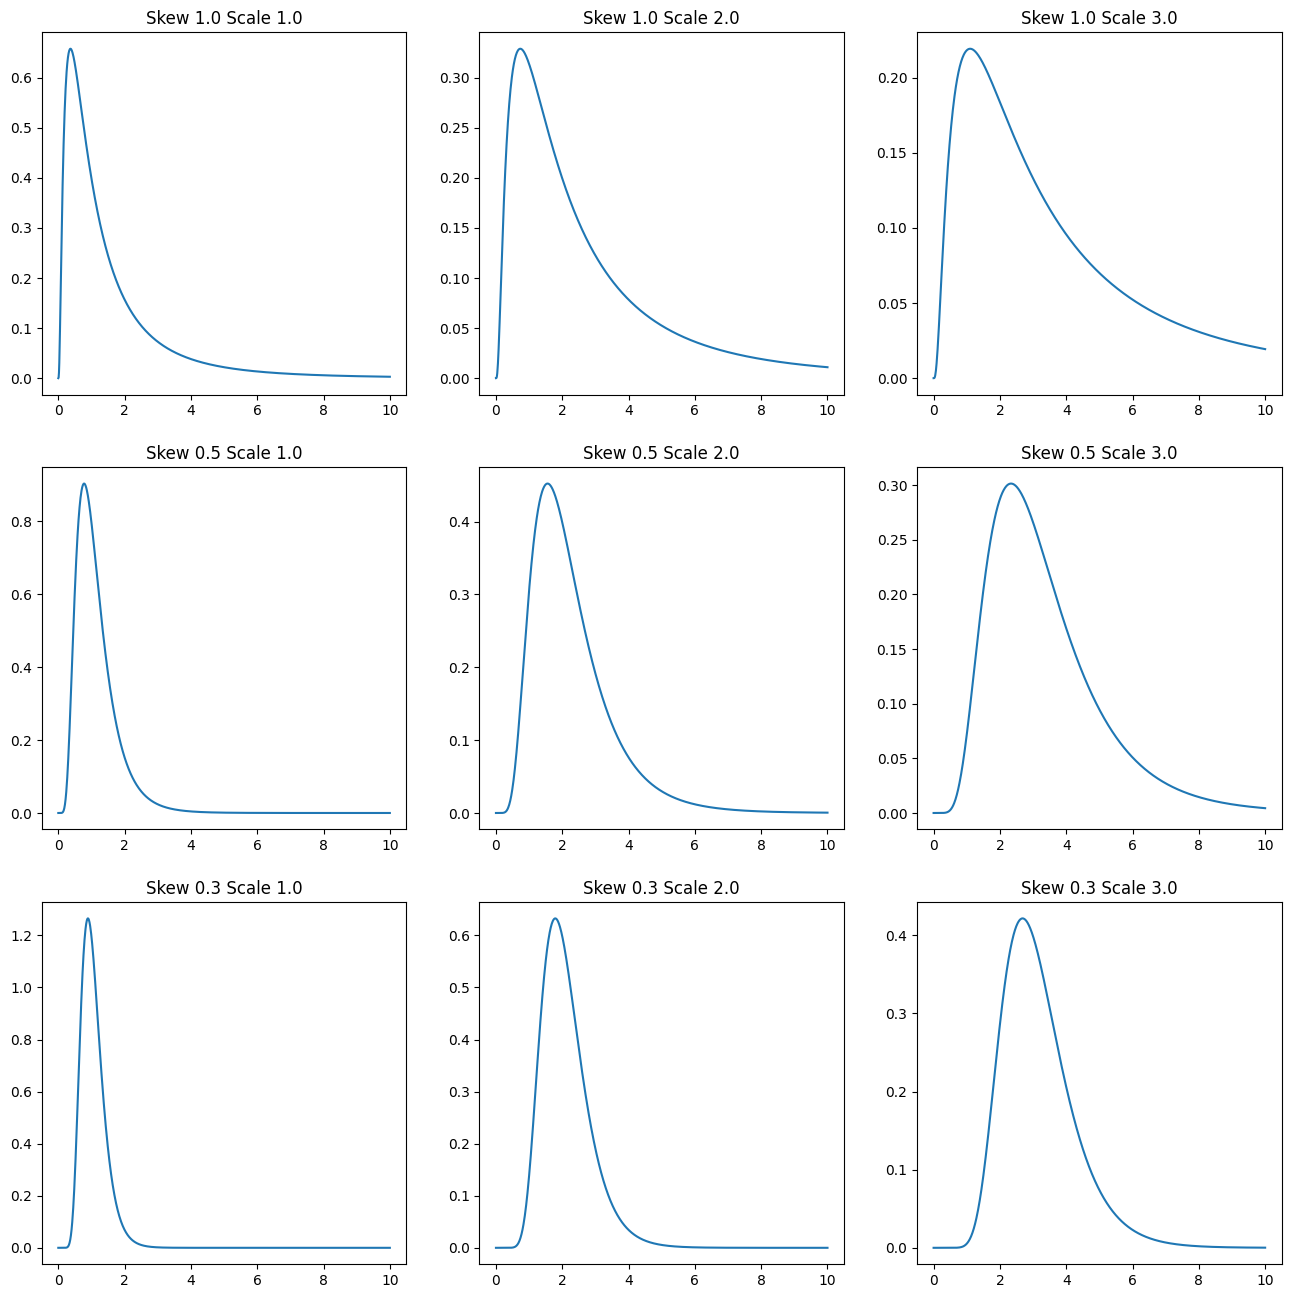

In [4]:
# example plots for different log-normal distributions
x = np.linspace(10**-3, 10**1, 1000)

fig, axes = plt.subplots(3, 3, figsize=(16, 16))

for i, _s in enumerate(np.arange(1, 4)):
    for j, _scale in enumerate(np.arange(1, 4)):
        y = lognorm.pdf(x, s=1/_s, loc=0, scale=_scale)
        
        axes[i, j].set_title(f'Skew {(1/_s):.1f} Scale {_scale:.1f}')
        axes[i, j].plot(x, y)

## Python function for fitting: scipy.optimize.curve_fit

Uses a least squares algorithm to find the best parameters for a basis function to fit observed data

### Usage

for more information see https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

```python

fun = lognorm.pdf  # basis function
indep_data = np.array([])  # Stimulation parameter, e.g. temporal frequency
depend_data = np.array([])  # Measured activity, e.g. DFF

curve_fit(fun, indep_data, depend_data)

```

### Possible caveat

PDF of log-normal distribution isn't scaled to range of measured data yet, so actual basis function may need to be modified:

```python

# Define a basis/model function based on lognorm
def lognormal_basis(*args):
    return lognorm.pdf  # needs to be modified to fit measured data

# Use new basis function for fitting
curve_fit(lognormal_basis, indep_data, depend_data)

```

### Optional parameters

p0: guess for the parameters used for initialization of fitting